In [1]:

# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.model_selection import train_test_split  # For splitting the dataset

# Load the wine dataset into a pandas DataFrame
df = pd.read_csv("wine.csv")


In [2]:

# Split the dataset into training and test sets, selecting 'density', 'sulphates', and 'residual_sugar'
# as features and 'quality' as the target variable. 70% of data is used for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(df[['density','sulphates','residual_sugar']], df['quality'], test_size=.3)


In [3]:

# Initialize the KNeighborsClassifier with 3 neighbors, then fit it to the training data
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [4]:

# Use the trained classifier to make predictions on the test set
prediction = classifier.predict(X_test)


In [5]:

# Calculate the number of correct predictions by comparing them to the true test labels
correct = np.where(prediction==y_test, 1, 0).sum()
print(correct)


882


In [6]:

# Calculate the accuracy of the model as the fraction of correct predictions over total predictions
accuracy = correct / len(y_test)
print(accuracy)


0.4523076923076923


In [7]:

# Initialize an empty list to store results of model accuracy for different values of k
results = []


k= 1  Accuracy= 0.5394871794871795
k= 3  Accuracy= 0.4523076923076923
k= 5  Accuracy= 0.4482051282051282
k= 7  Accuracy= 0.46923076923076923
k= 9  Accuracy= 0.45897435897435895
k= 11  Accuracy= 0.45282051282051283
k= 13  Accuracy= 0.44666666666666666
k= 15  Accuracy= 0.45384615384615384
k= 17  Accuracy= 0.4533333333333333
k= 19  Accuracy= 0.44
k= 21  Accuracy= 0.4369230769230769
k= 23  Accuracy= 0.441025641025641
k= 25  Accuracy= 0.4451282051282051
k= 27  Accuracy= 0.4379487179487179
k= 29  Accuracy= 0.44974358974358974
k= 31  Accuracy= 0.44564102564102565
k= 33  Accuracy= 0.43538461538461537
k= 35  Accuracy= 0.43025641025641026
k= 37  Accuracy= 0.42153846153846153
k= 39  Accuracy= 0.43333333333333335
k= 41  Accuracy= 0.4323076923076923
k= 43  Accuracy= 0.44051282051282054
k= 45  Accuracy= 0.44
k= 47  Accuracy= 0.4379487179487179
k= 49  Accuracy= 0.4287179487179487


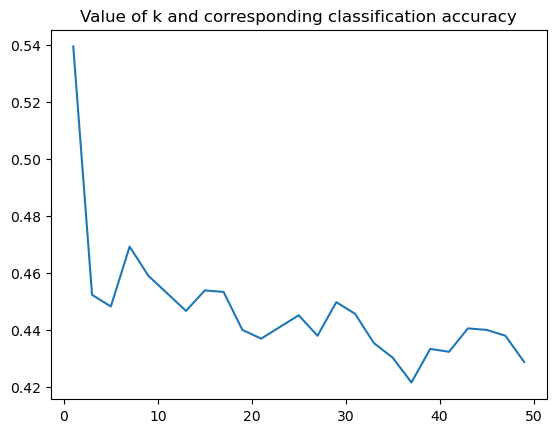

In [8]:

# Loop over a range of k values from 1 to 50 in steps of 2 to find the best k for the classifier
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)  # Define the classifier with current k
    classifier.fit(X_train, y_train)  # Train the classifier
    prediction = classifier.predict(X_test)  # Make predictions on the test set
    # Calculate accuracy and print it
    accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test)
    print("k=", k, " Accuracy=", accuracy)
    results.append([k, accuracy])  # Store the results (k and accuracy)

# Convert results list to a DataFrame for easy plotting
results = pd.DataFrame(results, columns=["k", "accuracy"])

# Plot the relationship between k and accuracy
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()
